<a href="https://colab.research.google.com/github/ChhaSahil/IPL_Cluster/blob/main/IPL_CLUSTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unsupervised Clustering of Tata IPL 2023 players**

<img src='https://cdn.wionews.com/sites/default/files/2023/02/24/334668-ipl-captains.png'>

###This file involves the clustering of players using 4 different algorithms and finding out which algorithm stands out and is able to cluster player in a reasonable manner.
<br>
Note - The data used here had been scrapped from Cricbuzz 

###Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (16,10)

###Reading the dataset

In [2]:
ipl = pd.read_excel('/content/IPL_MI (1).xlsx')

In [3]:
ipl.head()

,S.No.,Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Batting_Average,Balls_Faced,Strike Rate,...,Economy,Bowling Average,Strike Rate_Bowl,Five-Wicket Haul,Ten-Wicket Haul,image_url,Role,Team_IPL,Team_img,Age
0,0,Shikhar Dhawan,206,205,26,6243,106,34.88,4942,126.33,...,8.25,16.50,12.00,0,0,https://www.cricbuzz.com/a/img/v1/152x152/i1/c...,Batsman,Punjab Kings,https://www.cricbuzz.com/a/img/v1/24x18/i1/c22...,37
1,1,Harpreet Singh Bhatia,4,3,1,20,13,10.00,26,76.92,...,0.00,0.00,0.00,0,0,https://www.cricbuzz.com/a/img/v1/152x152/i1/c...,Batsman,Punjab Kings,https://www.cricbuzz.com/a/img/v1/24x18/i1/c22...,31
2,2,Liam Livingstone,23,23,3,549,70,27.45,329,166.87,...,8.96,35.83,24.00,0,0,https://www.cricbuzz.com/a/img/v1/152x152/i1/c...,Batsman,Punjab Kings,https://www.cricbuzz.com/a/img/v1/24x18/i1/c22...,29
3,3,Sikandar Raza,66,63,3,1259,87,20.98,977,128.86,...,7.18,26.66,22.26,0,0,https://www.cricbuzz.com/a/img/v1/152x152/i1/c...,Batting Allrounder,Punjab Kings,https://www.cricbuzz.com/a/img/v1/24x18/i1/c22...,36
4,4,Shahrukh Khan,19,18,4,270,47,19.29,222,121.62,...,0.00,0.00,0.00,0,0,https://www.cricbuzz.com/a/img/v1/152x152/i1/c...,Batting Allrounder,Punjab Kings,https://www.cricbuzz.com/a/img/v1/24x18/i1/c22...,27


In [4]:
ipl.drop(['Team_img','image_url','Team_IPL','Age','Ten-Wicket Haul','Double Hundreds'],axis=1,inplace=True)

In [5]:
ipl.head()

,S.No.,Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Batting_Average,Balls_Faced,Strike Rate,...,Fours,Sixes,Bowls Bowled,Runs Conceded,Wickets,Economy,Bowling Average,Strike Rate_Bowl,Five-Wicket Haul,Role
0,0,Shikhar Dhawan,206,205,26,6243,106,34.88,4942,126.33,...,701,136,48,66,4,8.25,16.50,12.00,0,Batsman
1,1,Harpreet Singh Bhatia,4,3,1,20,13,10.00,26,76.92,...,0,0,0,0,0,0.00,0.00,0.00,0,Batsman
2,2,Liam Livingstone,23,23,3,549,70,27.45,329,166.87,...,38,40,144,215,6,8.96,35.83,24.00,0,Batsman
3,3,Sikandar Raza,66,63,3,1259,87,20.98,977,128.86,...,99,47,846,1013,38,7.18,26.66,22.26,0,Batting Allrounder
4,4,Shahrukh Khan,19,18,4,270,47,19.29,222,121.62,...,13,19,0,0,0,0.00,0.00,0.00,0,Batting Allrounder


Text(0, 0.5, 'Number of Players')

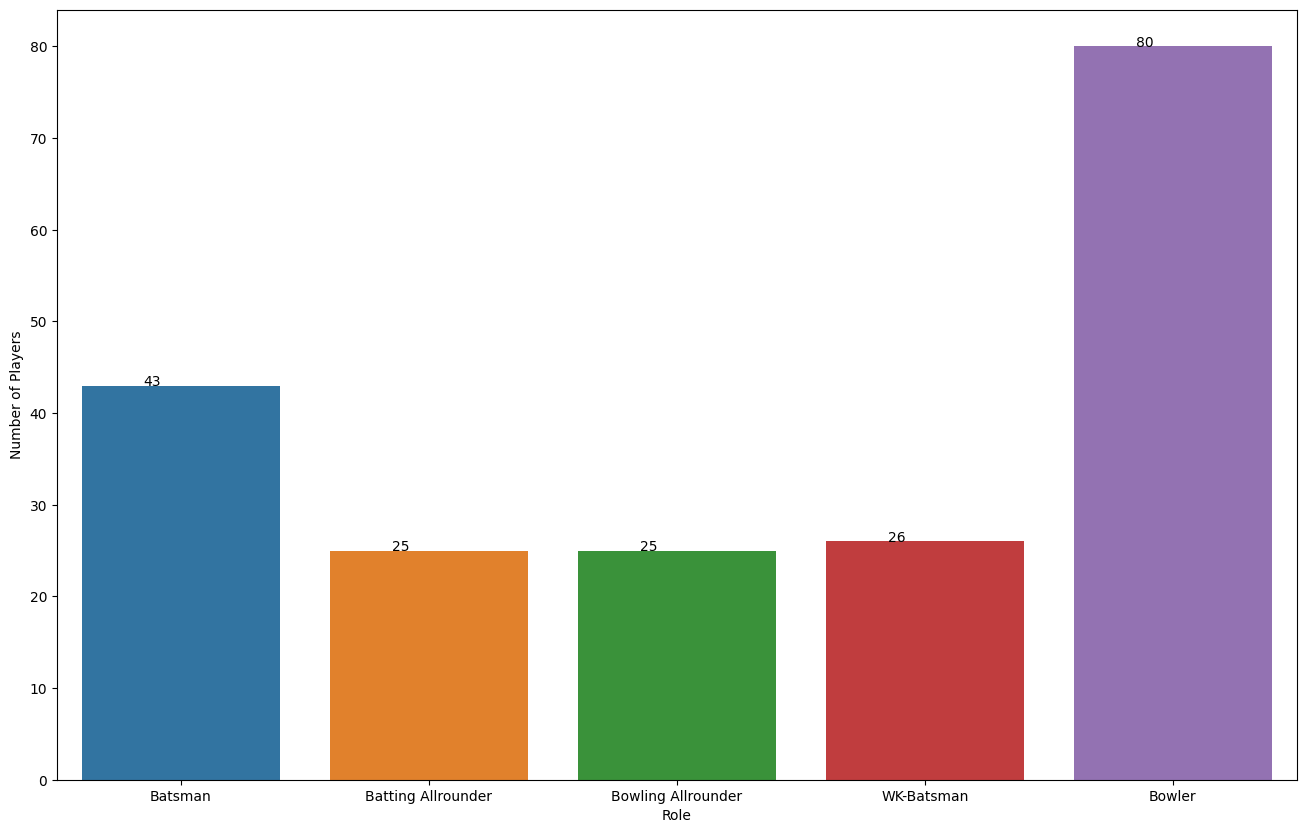

In [6]:
ax = sns.countplot(data = ipl,x='Role')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.ylabel('Number of Players')

(array([140.,  37.,  14.,   8.]),
 array([  1.  ,  59.25, 117.5 , 175.75, 234.  ]),
 <BarContainer object of 4 artists>)

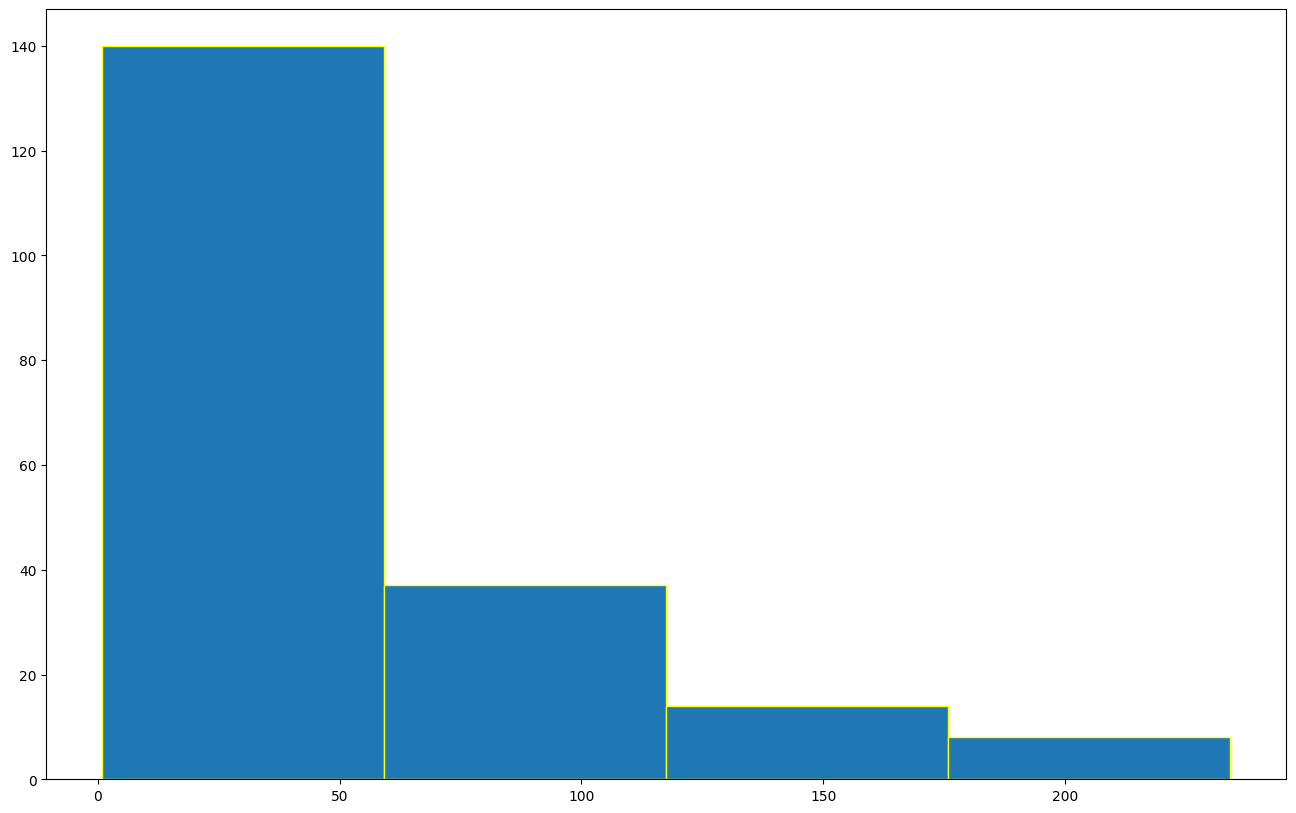

In [7]:
plt.hist(ipl.Matches,bins=4,edgecolor='yellow')

In [8]:
ipl.dtypes

S.No.                 int64
Name                 object
Matches               int64
Innings               int64
Not_Outs              int64
Runs                  int64
Highest_Score         int64
Batting_Average     float64
Balls_Faced           int64
Strike Rate         float64
Hundreds              int64
Half Century          int64
Fours                 int64
Sixes                 int64
Bowls Bowled          int64
Runs Conceded         int64
Wickets               int64
Economy             float64
Bowling Average     float64
Strike Rate_Bowl    float64
Five-Wicket Haul      int64
Role                 object
dtype: object

In [9]:
ipl.isnull().sum()

S.No.               0
Name                0
Matches             0
Innings             0
Not_Outs            0
Runs                0
Highest_Score       0
Batting_Average     0
Balls_Faced         0
Strike Rate         0
Hundreds            0
Half Century        0
Fours               0
Sixes               0
Bowls Bowled        0
Runs Conceded       0
Wickets             0
Economy             0
Bowling Average     0
Strike Rate_Bowl    0
Five-Wicket Haul    0
Role                0
dtype: int64

In [10]:
IPL = ipl.iloc[:,4:]

<ipython-input-11-08ebe509783d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(IPL.corr(),cmap='BuGn',annot=True)


<Axes: >

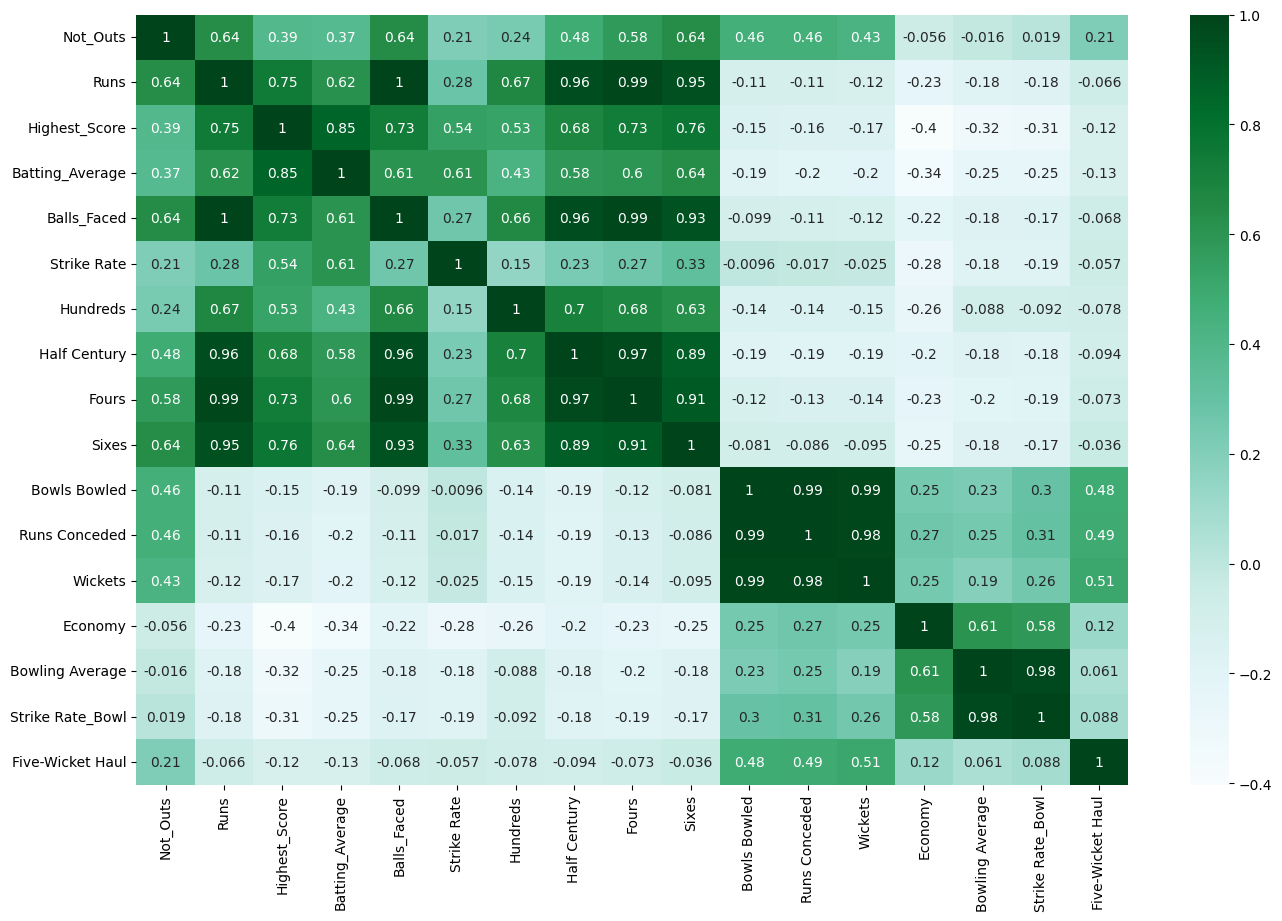

In [11]:
sns.heatmap(IPL.corr(),cmap='BuGn',annot=True)

In [12]:
IPL.drop(['Not_Outs','Highest_Score','Five-Wicket Haul','Role'],axis=1,inplace=True)

In [13]:
IPL.head()

,Runs,Batting_Average,Balls_Faced,Strike Rate,Hundreds,Half Century,Fours,Sixes,Bowls Bowled,Runs Conceded,Wickets,Economy,Bowling Average,Strike Rate_Bowl
0,6243,34.88,4942,126.33,2,47,701,136,48,66,4,8.25,16.50,12.00
1,20,10.00,26,76.92,0,0,0,0,0,0,0,0.00,0.00,0.00
2,549,27.45,329,166.87,0,4,38,40,144,215,6,8.96,35.83,24.00
3,1259,20.98,977,128.86,0,6,99,47,846,1013,38,7.18,26.66,22.26
4,270,19.29,222,121.62,0,0,13,19,0,0,0,0.00,0.00,0.00


In [14]:
IPL.shape

(199, 14)

###Let's Standardize the data

In [15]:
sc = StandardScaler()

In [16]:
sc_data = sc.fit_transform(IPL)

###Principal Component Analysis

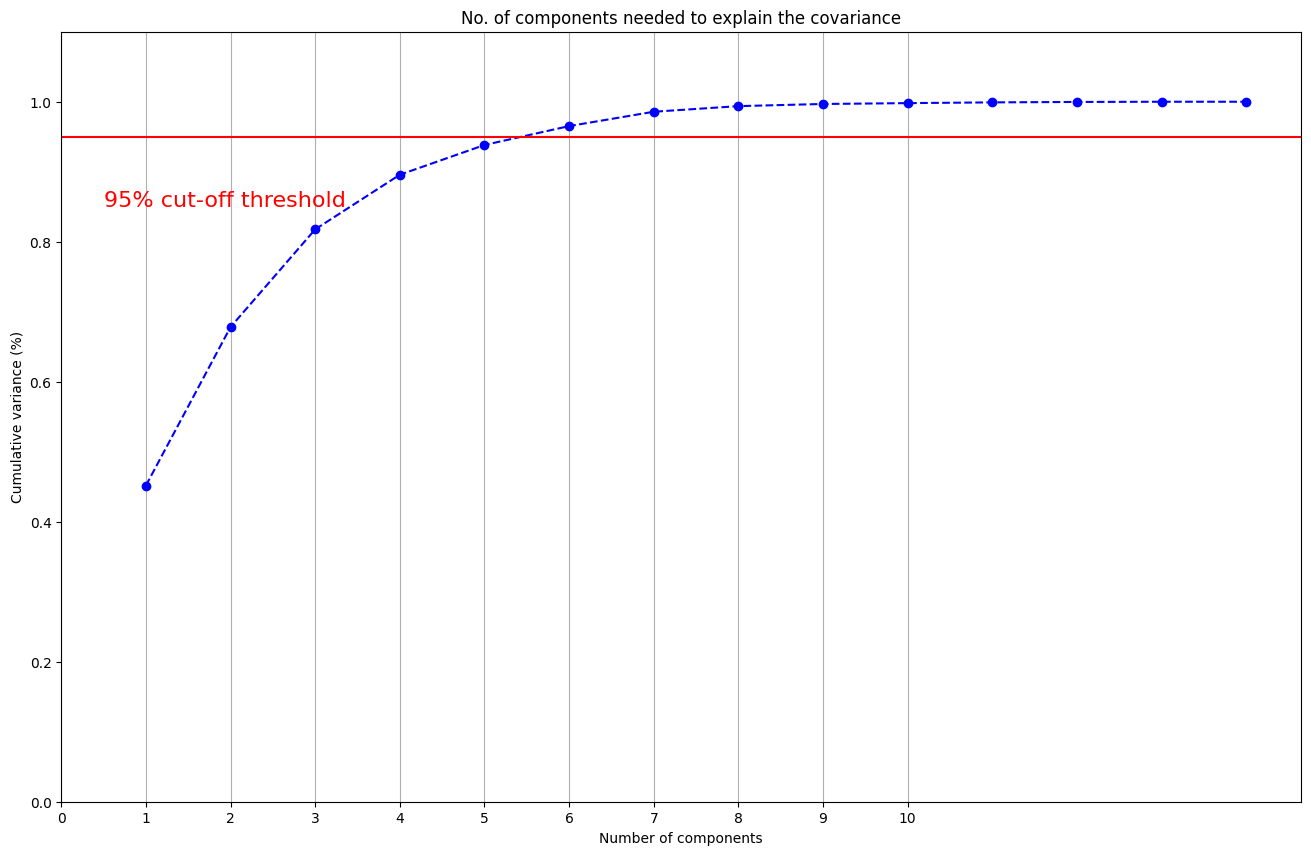

In [17]:
pca = PCA().fit(sc_data)

fig,ax = plt.subplots()
xi = np.arange(1,15,step = 1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi,y,marker = 'o', linestyle = '--', color = 'b')

plt.title('No. of components needed to explain the covariance')
plt.xlabel('Number of components')
plt.xticks(np.arange(0,11,step = 1))
plt.ylabel('Cumulative variance (%)')
plt.axhline(y = 0.95,color = 'r',linestyle = '-')
plt.text(0.5,0.85,'95% cut-off threshold',color = 'red',fontsize = 16)
ax.grid(axis='x')
plt.show()

So we need to set it to 5 components

In [18]:
pca = PCA(n_components = 5)

pca.fit(sc_data)
x = pca.transform(sc_data)

In [19]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter=300,n_init=10,random_state = 10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

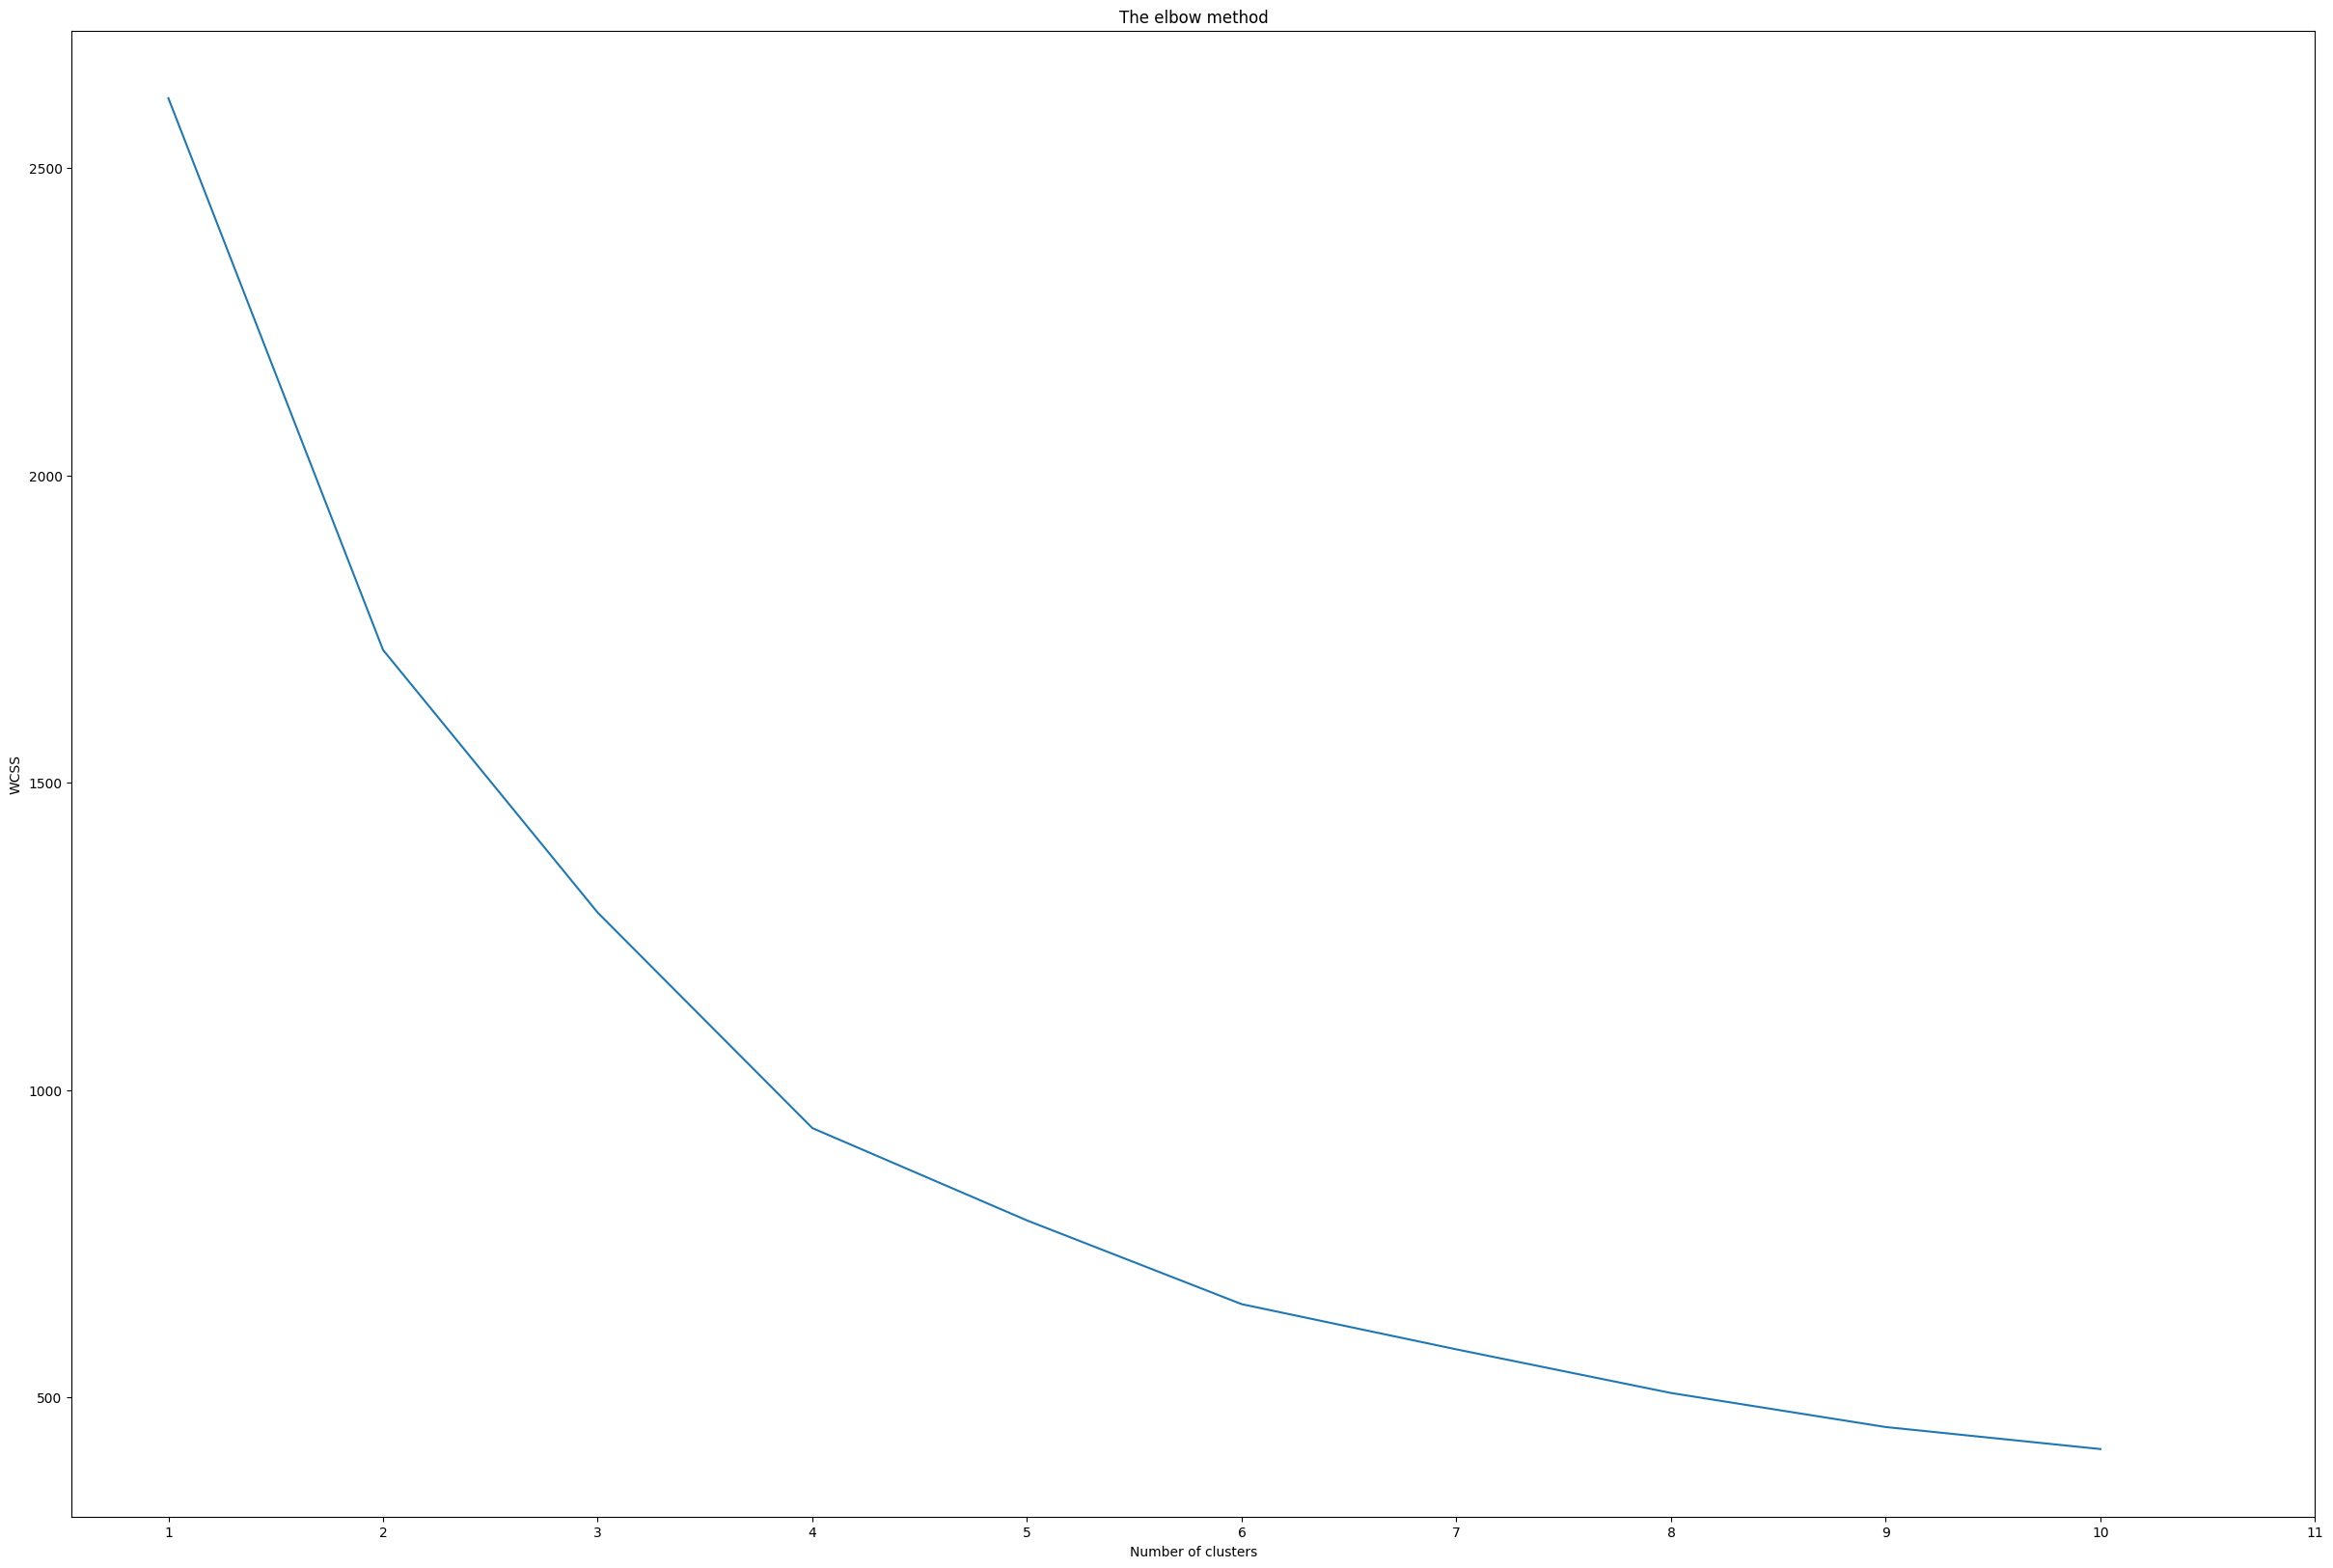

In [20]:
plt.figure(figsize=(30,20))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xticks(np.arange(1,12,step=1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
     

###So KMeans clusters our data into 4 clusters

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

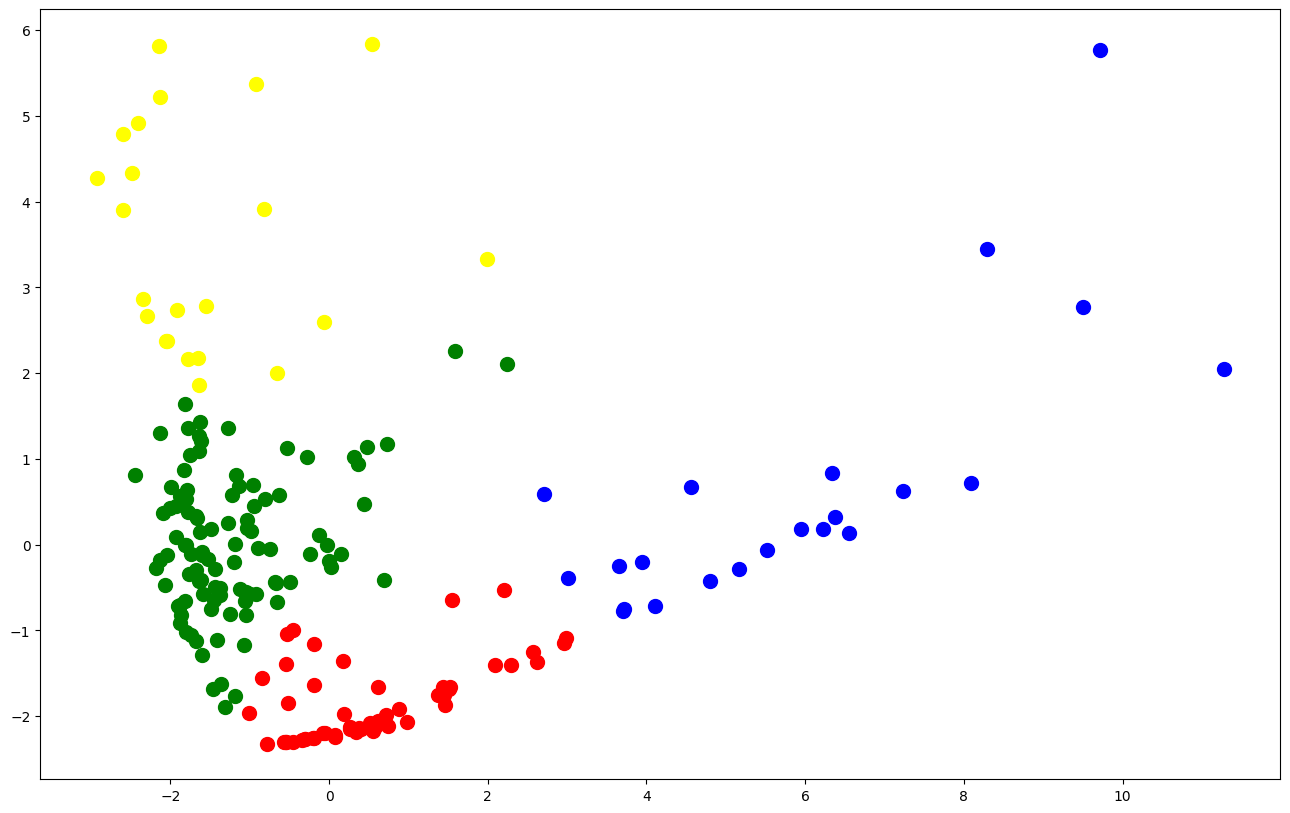

In [22]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1],
            s = 100, c = 'yellow')

In [23]:
ipl['kmeans'] = pd.DataFrame(y_kmeans)

In [24]:
ipl.head(15)

,S.No.,Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Batting_Average,Balls_Faced,Strike Rate,...,Sixes,Bowls Bowled,Runs Conceded,Wickets,Economy,Bowling Average,Strike Rate_Bowl,Five-Wicket Haul,Role,kmeans
0,0,Shikhar Dhawan,206,205,26,6243,106,34.88,4942,126.33,...,136,48,66,4,8.25,16.50,12.00,0,Batsman,1
1,1,Harpreet Singh Bhatia,4,3,1,20,13,10.00,26,76.92,...,0,0,0,0,0.00,0.00,0.00,0,Batsman,0
2,2,Liam Livingstone,23,23,3,549,70,27.45,329,166.87,...,40,144,215,6,8.96,35.83,24.00,0,Batsman,2
3,3,Sikandar Raza,66,63,3,1259,87,20.98,977,128.86,...,47,846,1013,38,7.18,26.66,22.26,0,Batting Allrounder,2
4,4,Shahrukh Khan,19,18,4,270,47,19.29,222,121.62,...,19,0,0,0,0.00,0.00,0.00,0,Batting Allrounder,0
5,5,Harpreet Brar,15,9,6,106,25,35.33,95,111.58,...,5,288,374,9,7.79,41.56,32.00,0,Batting Allrounder,2
6,6,Sam Curran,32,23,8,337,55,22.47,225,149.78,...,18,648,995,32,9.21,31.09,20.25,0,Bowling Allrounder,2
7,7,Rishi Dhawan,32,21,12,190,25,21.11,175,108.57,...,6,602,796,24,7.93,33.17,25.08,0,Bowling Allrounder,2
8,9,Prabhsimran Singh,6,6,0,64,16,10.67,66,96.97,...,2,0,0,0,0.00,0.00,0.00,0,WK-Batsman,0
9,10,Bhanuka Rajapaksa,9,9,0,206,43,22.89,129,159.69,...,13,0,0,0,0.00,0.00,0.00,0,WK-Batsman,0


In [25]:
ipl.kmeans.value_counts()

2    103
0     52
1     22
3     22
Name: kmeans, dtype: int64

###Let's analyze the clusters

In [26]:
ipl0 = ipl[ipl['kmeans']==0] 

In [27]:
ipl0.head()

,S.No.,Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Batting_Average,Balls_Faced,Strike Rate,...,Sixes,Bowls Bowled,Runs Conceded,Wickets,Economy,Bowling Average,Strike Rate_Bowl,Five-Wicket Haul,Role,kmeans
1,1,Harpreet Singh Bhatia,4,3,1,20,13,10.00,26,76.92,...,0,0,0,0,0.0,0.0,0.0,0,Batsman,0
4,4,Shahrukh Khan,19,18,4,270,47,19.29,222,121.62,...,19,0,0,0,0.0,0.0,0.0,0,Batting Allrounder,0
8,9,Prabhsimran Singh,6,6,0,64,16,10.67,66,96.97,...,2,0,0,0,0.0,0.0,0.0,0,WK-Batsman,0
9,10,Bhanuka Rajapaksa,9,9,0,206,43,22.89,129,159.69,...,13,0,0,0,0.0,0.0,0.0,0,WK-Batsman,0
10,11,Jitesh Sharma,12,10,2,234,44,29.25,143,163.64,...,12,0,0,0,0.0,0.0,0.0,0,WK-Batsman,0


In [28]:
ipl0.Role.value_counts()

Batsman               24
WK-Batsman            17
Batting Allrounder     6
Bowler                 4
Bowling Allrounder     1
Name: Role, dtype: int64

In [29]:
ipl1 = ipl[ipl['kmeans']==1]

In [30]:

ipl1.head()

,S.No.,Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Batting_Average,Balls_Faced,Strike Rate,...,Sixes,Bowls Bowled,Runs Conceded,Wickets,Economy,Bowling Average,Strike Rate_Bowl,Five-Wicket Haul,Role,kmeans
0,0,Shikhar Dhawan,206,205,26,6243,106,34.88,4942,126.33,...,136,48,66,4,8.25,16.50,12.00,0,Batsman,1
16,17,Shreyas Iyer,101,101,13,2776,96,31.55,2214,125.38,...,99,6,7,0,7.00,0.00,0.00,0,Batsman,1
18,19,Nitish Rana,91,85,7,2181,87,27.96,1625,134.22,...,111,127,177,7,8.36,25.29,18.14,0,Batsman,1
38,39,David Miller,105,102,35,2455,101,36.64,1783,137.69,...,113,0,0,0,0.00,0.00,0.00,0,Batsman,1
41,42,Kane Williamson,76,75,17,2101,89,36.22,1667,126.03,...,64,18,31,0,10.33,0.00,0.00,0,Batsman,1


In [31]:
ipl1.Role.value_counts()

Batsman       14
WK-Batsman     8
Name: Role, dtype: int64

In [32]:
ipl2 = ipl[ipl['kmeans']==2]

In [33]:
ipl2.Role.value_counts()

Bowler                62
Bowling Allrounder    18
Batting Allrounder    17
Batsman                5
WK-Batsman             1
Name: Role, dtype: int64

In [34]:
ipl3 = ipl[ipl['kmeans']==3]

In [35]:
ipl3.Role.value_counts()

Bowler                14
Bowling Allrounder     6
Batting Allrounder     2
Name: Role, dtype: int64

###So Kmeans Clustering was able to cluster batters and bowlers with good efficiency. Not only that it made a different cluster of high performing batters and bowlers.

In [36]:
db = DBSCAN(eps = 1.4, min_samples = 14).fit(x)

In [37]:
db.labels_

array([-1,  0,  1,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1, -1,
       -1, -1,  0,  1,  1,  1,  1, -1,  0,  0,  0,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  1,  0, -1,  0,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1, -1,  0,  0, -1, -1,  1,
        1,  1,  0,  1,  1,  1,  1, -1,  1,  1, -1,  1,  0,  0,  0, -1,  1,
       -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  0, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,
       -1,  1,  0, -1,  0,  1,  0,  1,  1, -1, -1, -1,  0,  1, -1,  1,  1,
        1, -1,  1,  0, -1,  0,  0,  0, -1,  0, -1,  1,  1, -1, -1,  0,  0,
        1,  1, -1,  1, -1, -1,  0,  0, -1, -1,  0,  1,  1,  1,  0,  0, -1,
        1,  1,  1,  1,  1,  1,  1,  0, -1, -1,  0,  0, -1,  1,  1,  0, -1,
       -1,  0,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1])

In [38]:
db.core_sample_indices_

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,  15,
        19,  20,  23,  25,  27,  30,  33,  34,  35,  37,  39,  43,  44,
        46,  47,  49,  50,  51,  55,  56,  58,  60,  63,  64,  67,  68,
        69,  70,  71,  72,  74,  76,  77,  79,  80,  81,  86,  89,  92,
        94,  95,  96,  98, 104, 106, 107, 109, 110, 112, 113, 115, 117,
       118, 121, 125, 126, 127, 131, 134, 136, 138, 141, 147, 148, 153,
       156, 160, 164, 165, 167, 168, 171, 172, 173, 174, 175, 176, 177,
       180, 183, 184, 188, 192, 193, 195, 196, 197])

In [39]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [40]:
n_clusters_

2

['y', 'b', 'g', 'r', 'orange', 'cyan']


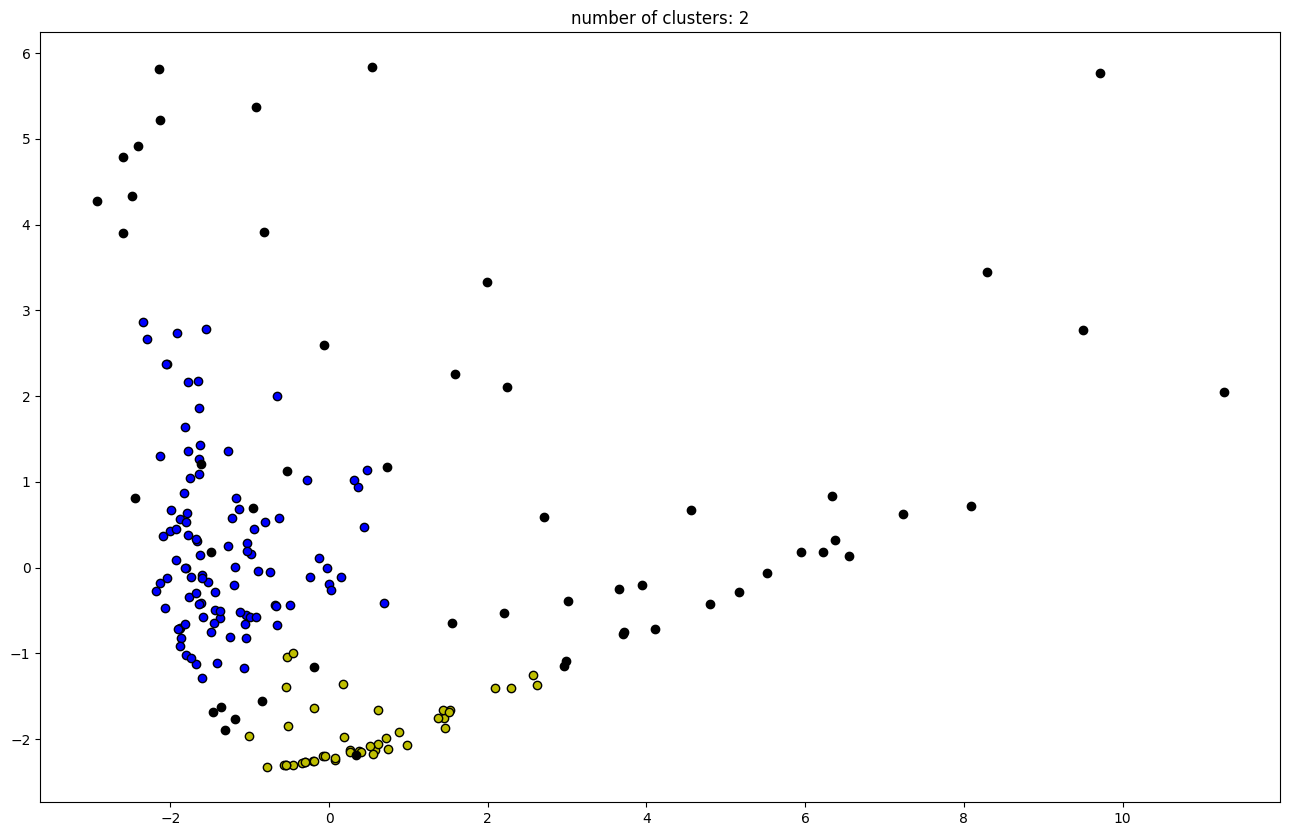

In [41]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r','orange','cyan']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

###DBSCAN is not able to perform well since the data may have large differences in densities. 

In [42]:
gmm = GaussianMixture(n_components=4)
gmm.fit(x)

GaussianMixture(n_components=4)

In [43]:
labels = gmm.predict(x)

In [44]:
ipl['gmixture'] = labels

In [45]:
ipl.gmixture.value_counts()

0    77
2    61
1    47
3    14
Name: gmixture, dtype: int64

In [46]:
ipl0_gm = ipl[ipl['gmixture']==0]
ipl1_gm = ipl[ipl['gmixture']==1]
ipl2_gm = ipl[ipl['gmixture']==2]
ipl3_gm = ipl[ipl['gmixture']==3]

In [47]:
ipl0_gm.Role.value_counts()

Bowler                50
Bowling Allrounder    14
Batting Allrounder     8
Batsman                4
WK-Batsman             1
Name: Role, dtype: int64

In [48]:
ipl1_gm.Role.value_counts()

Bowler                23
Batting Allrounder    12
Bowling Allrounder    10
Batsman                2
Name: Role, dtype: int64

In [49]:

ipl2_gm.Role.value_counts()

Batsman               29
WK-Batsman            19
Bowler                 7
Batting Allrounder     5
Bowling Allrounder     1
Name: Role, dtype: int64

In [50]:
ipl3_gm.Role.value_counts()

Batsman       8
WK-Batsman    6
Name: Role, dtype: int64

###Gaussian Mixture model performed better than DBSCAN but is not as efficient as KMeans due to data being not normally distributed

In [51]:
model = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)

In [52]:
model.fit(x)

Birch(n_clusters=4, threshold=1.5)

In [53]:
pred = model.predict(x)

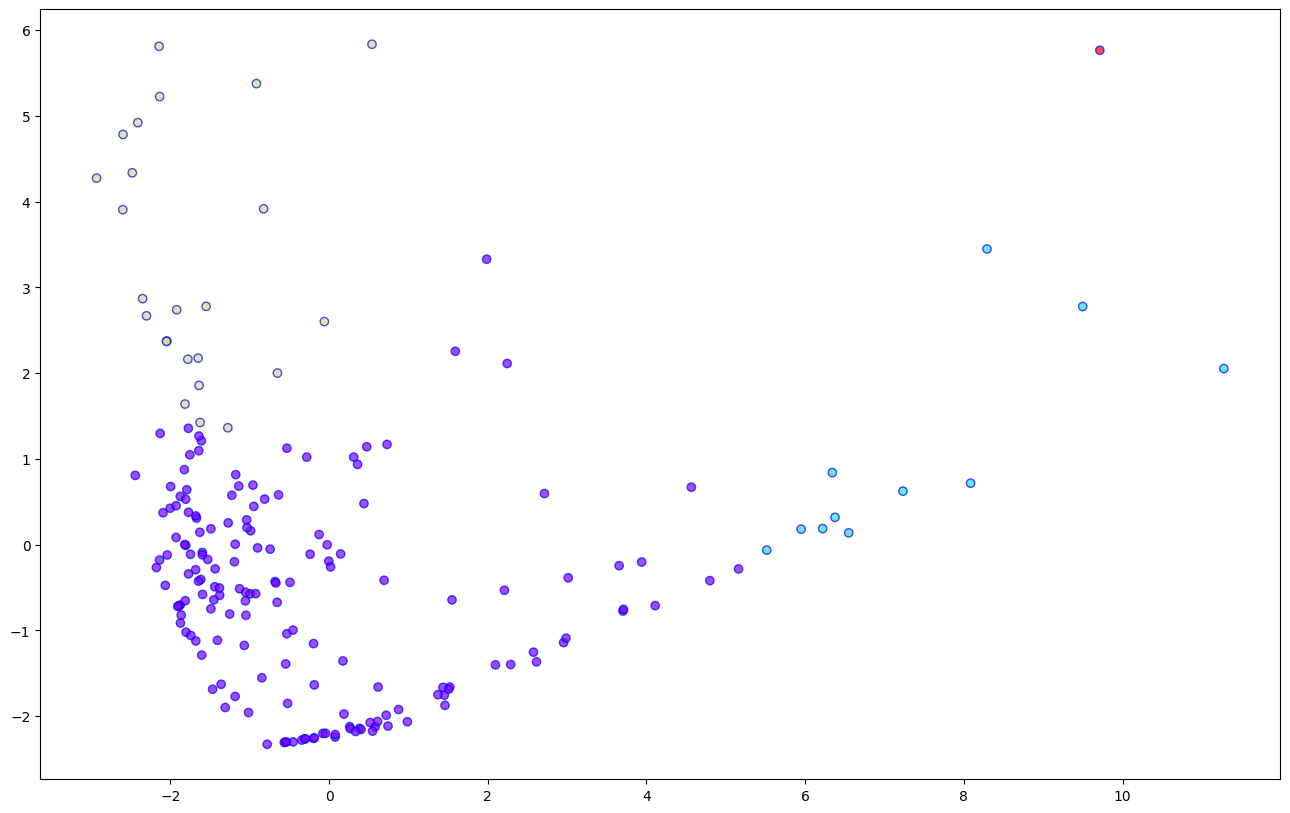

In [54]:
plt.scatter(x[:, 0], x[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

In [55]:
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2])

In [56]:
len(pred)

199

In [57]:
ipl['birch'] = pd.DataFrame(pred)

In [58]:
ipl.birch.value_counts()

0    163
2     24
1     11
3      1
Name: birch, dtype: int64

###Birch Clustering also is not able to perform well

##So KMeans was able to cluster the players better than any other algorithm used